In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 37.4MB/s]


In [7]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words//2, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           258000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              5156866   
Total params: 6,263,775
Trainable params: 6,263,775
Non-trainable params: 0
____________________________________________

In [8]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 25s 29ms/step - loss: 6.9873 - accuracy: 0.0210
Epoch 2/100
484/484 [==============================] - 14s 30ms/step - loss: 6.5122 - accuracy: 0.0214
Epoch 3/100
484/484 [==============================] - 14s 29ms/step - loss: 6.4201 - accuracy: 0.0248
Epoch 4/100
484/484 [==============================] - 14s 30ms/step - loss: 6.2957 - accuracy: 0.0291
Epoch 5/100
484/484 [==============================] - 14s 30ms/step - loss: 6.1934 - accuracy: 0.0319
Epoch 6/100
484/484 [==============================] - 14s 30ms/step - loss: 6.1049 - accuracy: 0.0379
Epoch 7/100
484/484 [==============================] - 14s 30ms/step - loss: 6.0159 - accuracy: 0.0400
Epoch 8/100
484/484 [==============================] - 14s 29ms/step - loss: 5.9187 - accuracy: 0.0433
Epoch 9/100
484/484 [==============================] - 14s 29ms/step - loss: 5.8164 - accuracy: 0.0479
Epoch 10/100
484/484 [==============================] - 14s 29ms/step - l

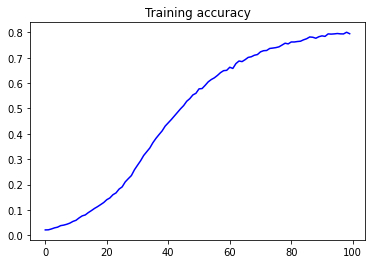

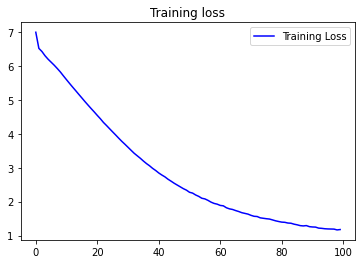

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose = 0)
	predicted = np.argmax(predicted, axis = 1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and well as both behind bright burn'd date sit hid with goodly pride of hue both sense both fuel night up grow lust both so lease away still grew thence night them young thee up give doubt it green things strong remedy cured lack still out 'tis me back alone belongs my friend self will ' thee seen none lived alone shine bright it doth find room room now taken away releasing room night away ' had days bright know it live in good care gain her moan as hearts hand may cold ill bright new bright still afloat cross
